In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

# per importare cose nella folder precedente da ora in poi
import sys
sys.path.append('../')

from layer import HiddenLayer
from activations import *
from losses import *
from network import Network
from regularizers import *
from utils import *
from metrics import *
from validation import *
from gridsearch import grid_search

random.seed(42)
np.random.seed(42)

# Progress bar
from tqdm import tqdm
import time

In [2]:
X_train, y_train, test = read_cup("../data/ML-CUP23-TR.csv", "../data/ML-CUP23-TS.csv")

### Separating training set and test set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

### Rescaling the output to the [0,1] range

In [4]:
from sklearn.preprocessing import MinMaxScaler

rescaler = MinMaxScaler()
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
rescaler.fit(y_train)
y_train = rescaler.transform(y_train)
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)

Combination: [64, 64, 3] ReLU Fan_in (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.0005


Epochs:  12%|█▏        | 1184/10000 [00:37<04:37, 31.81it/s]


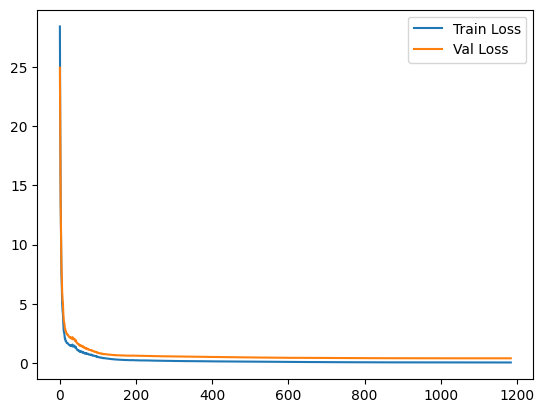

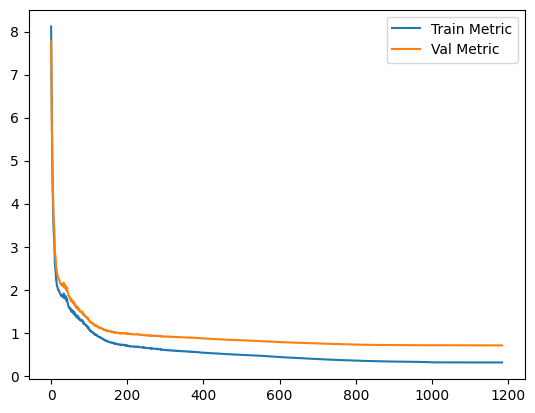

Fold 1 of 6 completed
Train Loss: 0.05128428316124427
Train Metric: 0.32517721127055493
Val Loss: 0.40062615459148204
Val Metric: 0.7104069470844782


Epochs:  14%|█▍        | 1427/10000 [00:45<04:33, 31.38it/s]


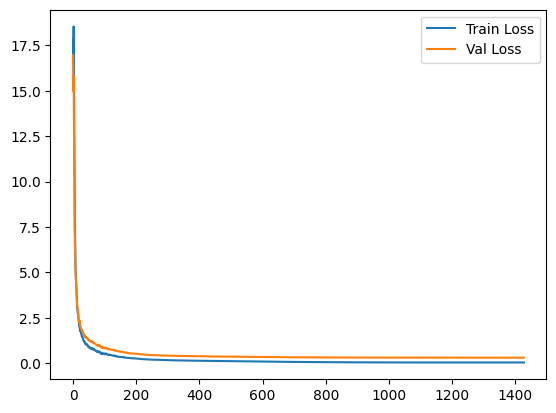

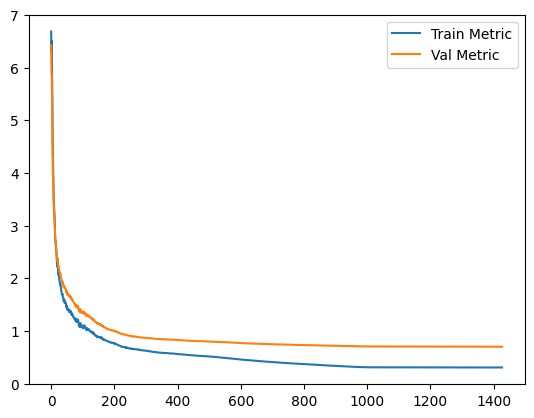

Fold 2 of 6 completed
Train Loss: 0.04176089860651679
Train Metric: 0.308480603378464
Val Loss: 0.3069496390077911
Val Metric: 0.7041452489064258


Epochs:  13%|█▎        | 1336/10000 [00:43<04:43, 30.56it/s]


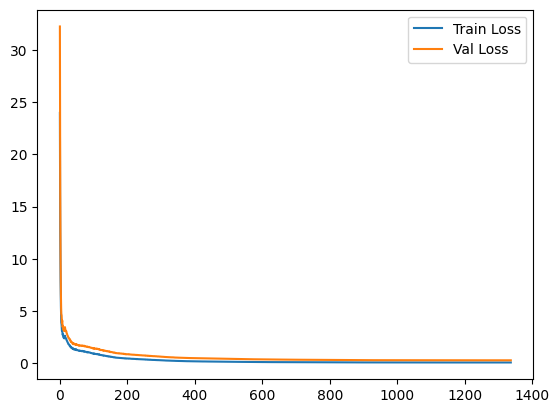

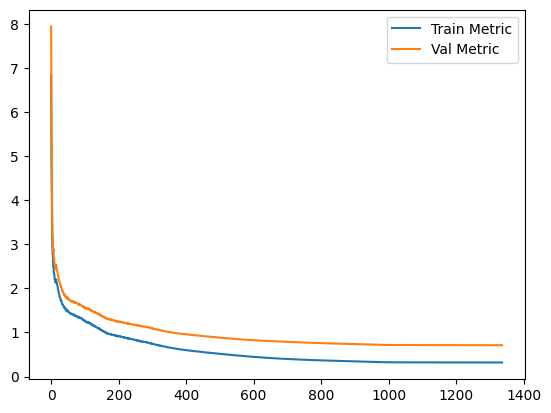

Fold 3 of 6 completed
Train Loss: 0.04384829125511261
Train Metric: 0.3218771008128846
Val Loss: 0.25484759607010055
Val Metric: 0.713871648769426


Epochs:  12%|█▏        | 1230/10000 [00:40<04:48, 30.40it/s]


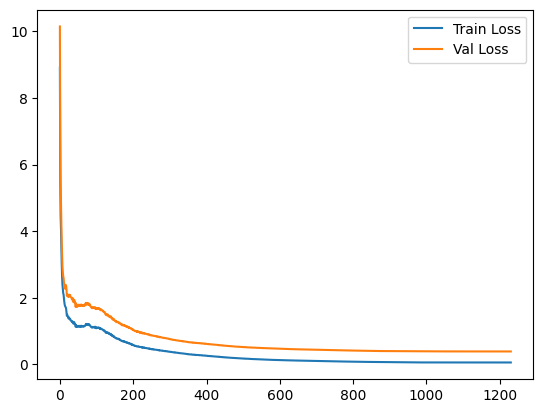

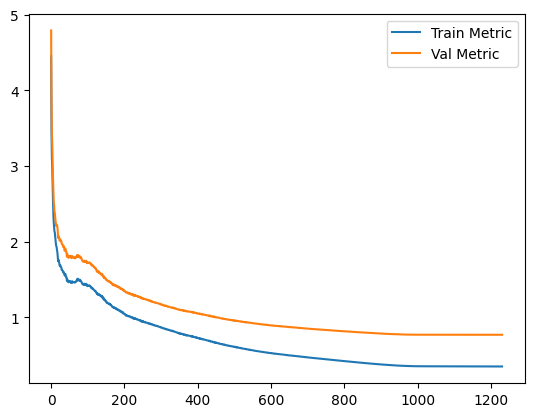

Fold 4 of 6 completed
Train Loss: 0.05645546894176964
Train Metric: 0.3569412231997341
Val Loss: 0.3894802756545012
Val Metric: 0.7724550701657099


Epochs:  13%|█▎        | 1347/10000 [00:43<04:41, 30.79it/s]


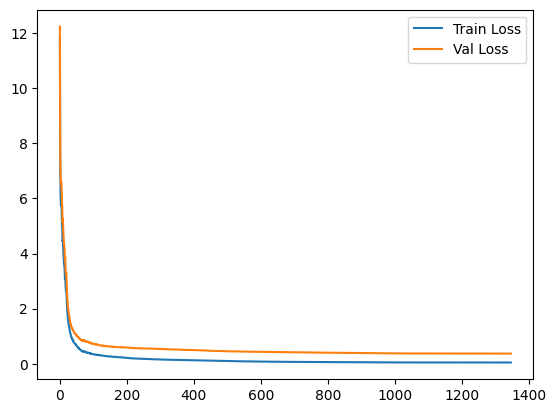

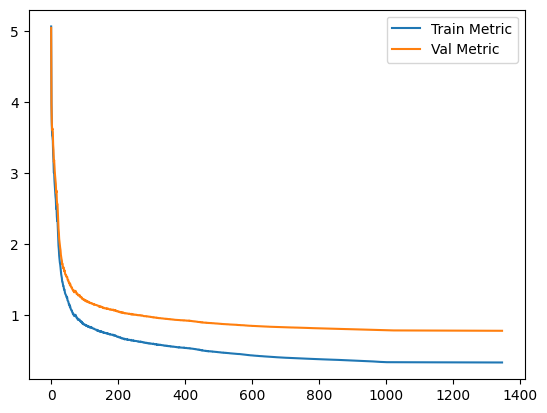

Fold 5 of 6 completed
Train Loss: 0.04704084441129195
Train Metric: 0.32808670870741513
Val Loss: 0.3731389546197278
Val Metric: 0.7760714538012266


Epochs:  15%|█▍        | 1465/10000 [00:48<04:40, 30.45it/s]


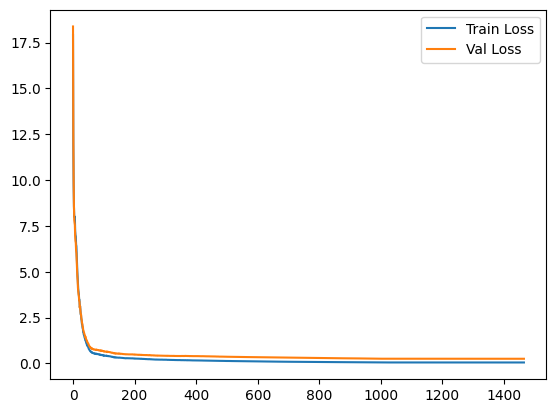

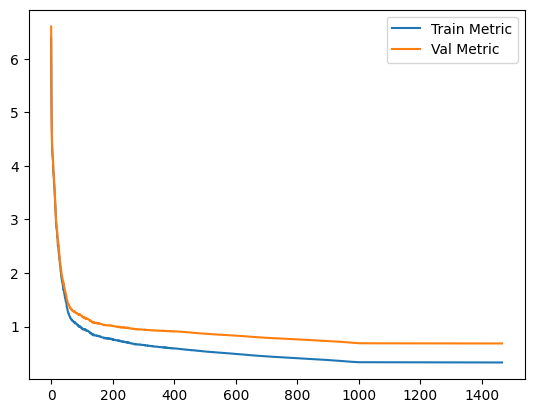

Fold 6 of 6 completed
Train Loss: 0.0483653180191368
Train Metric: 0.3313999306945192
Val Loss: 0.2512298347145236
Val Metric: 0.6858930817447275
Combination: [64, 64, 3] ReLU Fan_in (-0.5, 0.5) L2 1e-08 ('Nesterov', 0.9) 0.0005
Statistics: {'tr_loss': 0.048125850732512014, 'tr_metric': 0.3286604630105953, 'val_loss': 0.32937874244302107, 'val_metric': 0.7271405750786656}





In [12]:
hyperparameters = {
    'layers_sizes': [[64, 64, 3]],
    'activations': ["ReLU"], 
    'startings': ["Fan_in"],
    'startings_range': [(-0.5, 0.5)],
    'regularizers': ["L2"],
    'regularizers_lambda': [1e-8],
    'momentums': [('Nesterov', 0.9)],
    'etas': [5e-4],
}

data_to_csv = grid_search(
    hyperparams=hyperparameters,
    X=X_train,
    y=y_train,
    k=6,
    metric=MEE(),
    loss=MSE(1),
    seed=6,
    verbose=True
)

In [ ]:
# reshape ytrain eliminating last shape
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
y_train.shape

In [ ]:
# reshape Xtrain eliminating last shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_train.shape

In [ ]:
# use scikit-lear to make regression in 3d
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(32,32),
    activation='relu',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=1e-3,
    max_iter=2500,
    shuffle=True,
    random_state=6,
    verbose=True,
    momentum=0,
    beta_1= 0,
    beta_2= 0.,
    epsilon= 1,
    validation_fraction = 0,
    nesterovs_momentum=False
)

mlp.fit(X_train, y_train)
# print the learning curve
plt.plot(mlp.loss_curve_)
plt.show()

# print the mean error
print(MEE()(y_train, mlp.predict(X_train)))

In [9]:
import csv

csv_file_path = '../statistics/test.csv'
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Write the data to the CSV file
    for row in data_to_csv:
        writer.writerow(row)    

# Second step of the gridsearch
 initializing weights around the best ones found in the first step ...
 or maybe put regularization just on the last layer ...
 or maybe changing the momentum ...
 but the structure of the net is the same

# Let's test in the test set! (NOT the blind one)
- k-fold cv (train and val set) gridsearch --> in the cells above
- train the best model on the whole training set
- test on the test set

In [6]:
# Set the hyperparameters of the model than won the gridsearch
np.random.seed(6)

best_net = Network(MSE(1), eta=5e-4)

best_net.add_layer(
    input_size=len(X_train[0]),
    units_size=64,
    starting=Fan_in(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-8),
    momentum=('Nesterov', 0.9)
)

best_net.add_layer(
    input_size=64,
    units_size=64,
    starting=Fan_in(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-8),
    momentum=('Nesterov', 0.9)
)

best_net.add_layer(
    input_size=64,
    units_size=3,
    starting=Fan_in(),
    activation=Identity(),
    regularizer=L2(lambda_=1e-8),
    momentum=('Nesterov', 0.9)
)

We have the bet net, let's train it on the whole training set. BUT when should we stop? We try 2 things:
- early stopping using the whole training set as validation set
- max number of epochs that were necessary to the best model in the k-fold cv

1. Let's train the best model on the whole training set using early stopping monitoring the whole training set 

In [7]:
info = best_net.train(
    X_train, 
    y_train,
    X_train, 
    y_train,
    epochs=10000, 
    metric=MEE(),
    patience=250
)

Epochs:  13%|█▎        | 1321/10000 [00:54<05:55, 24.39it/s]


Train Loss:  0.04281344759554002
Train Metric:  0.31974251210759597


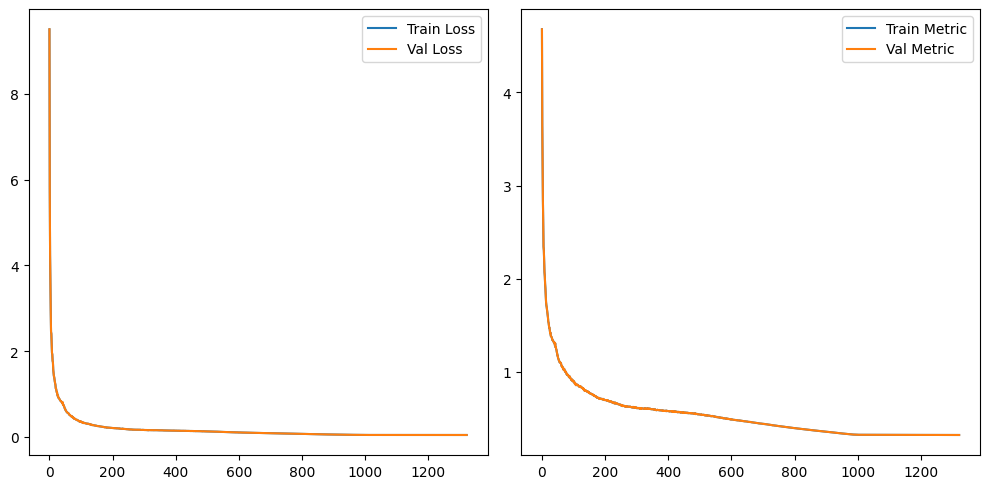

In [11]:
# Let's print the last value of the loss and metric on the training set (= val set)
print("Train Loss: ", info['tr_losses'][-1])
print("Train Metric: ", info['tr_metrics'][-1])

# Let's plot the train (and val) loss and metric
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(info['tr_losses'], label='Train Loss')
plt.plot(info['val_losses'], label='Val Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(info['tr_metrics'], label='Train Metric')
plt.plot(info['val_metrics'], label='Val Metric')
plt.legend()


plt.tight_layout()
plt.show()

In [19]:
# Let's see the output of the best model on the test set
y_pred = np.zeros((X_test.shape[0], 3, 1))

for i in range(X_test.shape[0]):
    y_pred[i] = best_net.forward(X_test[i])

# Let's print the metric on the test set
print("Test Metric: ", MEE()(y_test, y_pred))

Test Metric:  0.6606804179384909


2. Let's train the best model on the whole training set using the max number of epochs that were necessary to the best model in the k-fold cv

In [27]:
# !!! RESET THE BEST NET !!!
np.random.seed(6)

best_net = Network(MSE(1), eta=5e-4)

best_net.add_layer(
    input_size=len(X_train[0]),
    units_size=64,
    starting=Fan_in(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-8),
    momentum=('Nesterov', 0.9)
)

best_net.add_layer(
    input_size=64,
    units_size=64,
    starting=Fan_in(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-8),
    momentum=('Nesterov', 0.9)
)

best_net.add_layer(
    input_size=64,
    units_size=3,
    starting=Fan_in(),
    activation=Identity(),
    regularizer=L2(lambda_=1e-8),
    momentum=('Nesterov', 0.9)
)

In [28]:
info = best_net.train(
    X_train, 
    y_train,
    X_train, 
    y_train,
    epochs=1465, 
    patience=1465, # so it won't be used
    metric=MEE()
)

Epochs: 100%|██████████| 1465/1465 [01:00<00:00, 24.25it/s]


Train Loss:  0.042650402066250696
Train Metric:  0.3191501614790996


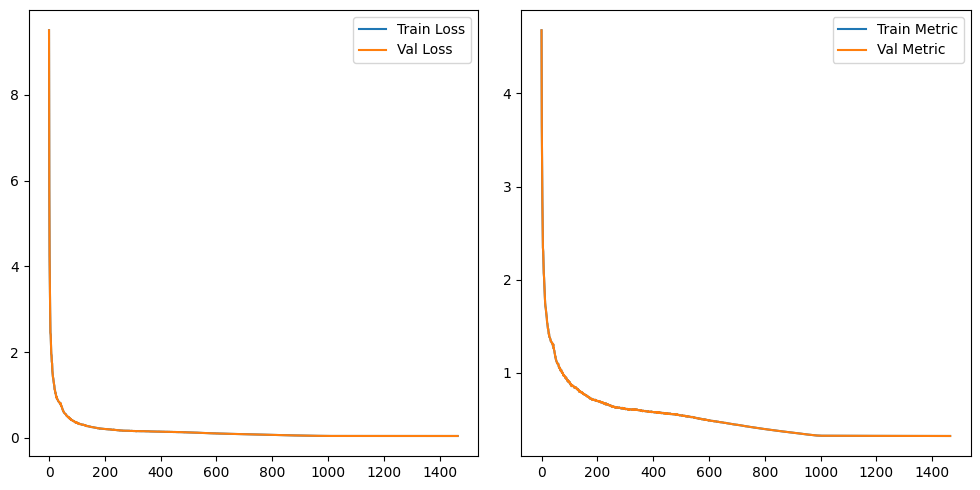

In [29]:
# Let's print the last value of the loss and metric on the training set (= val set)
print("Train Loss: ", info['tr_losses'][-1])
print("Train Metric: ", info['tr_metrics'][-1])

# Let's plot the train (and val) loss and metric
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(info['tr_losses'], label='Train Loss')
plt.plot(info['val_losses'], label='Val Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(info['tr_metrics'], label='Train Metric')
plt.plot(info['val_metrics'], label='Val Metric')
plt.legend()


plt.tight_layout()
plt.show()

In [30]:
# Let's see the output of the best model on the test set
y_pred = np.zeros((X_test.shape[0], 3, 1))

for i in range(X_test.shape[0]):
    y_pred[i] = best_net.forward(X_test[i])

# Let's print the metric on the test set
print("Test Metric: ", MEE()(y_test, y_pred))

Test Metric:  0.6569128436757649


... but if we go on and on and on ...

In [47]:
info = best_net.train(
    X_train, 
    y_train,
    X_train, 
    y_train,
    epochs=1000, 
    patience=1000, # so it won't be used
    metric=MEE()
)

Epochs: 100%|██████████| 1000/1000 [00:42<00:00, 23.73it/s]


Train Loss:  0.011296812263675914
Train Metric:  0.1654674515068227


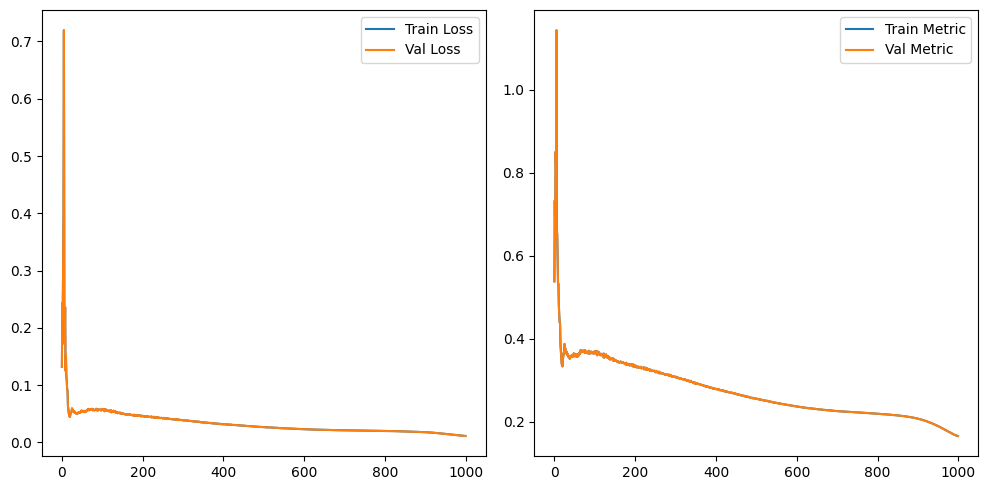

In [48]:
# Let's print the last value of the loss and metric on the training set (= val set)
print("Train Loss: ", info['tr_losses'][-1])
print("Train Metric: ", info['tr_metrics'][-1])

# Let's plot the train (and val) loss and metric
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(info['tr_losses'], label='Train Loss')
plt.plot(info['val_losses'], label='Val Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(info['tr_metrics'], label='Train Metric')
plt.plot(info['val_metrics'], label='Val Metric')
plt.legend()


plt.tight_layout()
plt.show()

In [49]:
# Let's see the output of the best model on the test set
y_pred = np.zeros((X_test.shape[0], 3, 1))

for i in range(X_test.shape[0]):
    y_pred[i] = best_net.forward(X_test[i])

# Let's print the metric on the test set
print("Test Metric: ", MEE()(y_test, y_pred))

Test Metric:  0.544866073729173


In [ ]:
0.5378314730327738